<a href="https://colab.research.google.com/github/pavananna/Project-8/blob/main/P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
d1 = pd.read_csv(r"/content/all_upwork_jobs_2024-02-07-2024-03-24.csv")

In [3]:
d1.sample(10)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
484,"2d or 3d Sketchup, 3d modeling, 3d animation",https://www.upwork.com/jobs/Sketchup-modeling-...,2024-02-16 16:15:04+00:00,False,NaN,NaN,15.0,United States
194075,European Trade Mark Registration,https://www.upwork.com/jobs/European-Trade-Mar...,2024-03-15 13:32:32+00:00,False,NaN,NaN,125.0,Canada
194677,I need a General Virtual Assistance,https://www.upwork.com/jobs/need-General-Virtu...,2024-03-18 00:31:05+00:00,False,NaN,NaN,5.0,China
205485,Interzoo Exhibitions Recruitment Sales,https://www.upwork.com/jobs/Interzoo-Exhibitio...,2024-03-20 07:47:59+00:00,True,50.0,110.0,NaN,China
103555,Help with godaddy account shut down,https://www.upwork.com/jobs/Help-with-godaddy-...,2024-03-02 17:39:49+00:00,True,NaN,NaN,NaN,NaN
76406,Implement consent for ads personalization,https://www.upwork.com/jobs/Implement-consent-...,2024-02-24 16:44:08+00:00,False,NaN,NaN,200.0,Romania
58743,Beta readers wanted for contemporary romance n...,https://www.upwork.com/jobs/Beta-readers-wante...,2024-02-23 08:14:45+00:00,False,NaN,NaN,50.0,NaN
189881,Ruby on Rails QA,https://www.upwork.com/jobs/Ruby-Rails_%7E01d1...,2024-03-12 15:35:45+00:00,True,NaN,NaN,NaN,United States
238429,Experienced Manual Testers Needed ASAP,https://www.upwork.com/jobs/Experienced-Manual...,2024-03-20 05:22:07+00:00,True,25.0,NaN,NaN,Kenya
228354,I need someone to create an account here for m...,https://www.upwork.com/jobs/need-someone-creat...,2024-03-22 11:28:43+00:00,False,NaN,NaN,5.0,NaN


In [4]:
d1.shape

(244828, 8)

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
d1.describe()

,hourly_low,hourly_high,budget
count,102422.000000,98775.000000,103891.000000
mean,17.339644,41.970610,911.473564
std,18.140065,47.850892,15729.738834
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,25.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,998.000000,999.000000,1000000.000000


In [7]:
d1.isnull().mean()

,0
title,0.000004
link,0.000004
published_date,0.000000
is_hourly,0.000000
hourly_low,0.581657
hourly_high,0.596553
budget,0.575657
country,0.020737


In [10]:
def get_categorical_and_numerical_column(df):
  categorical_column = []
  numerical_column = []
  for column in df.columns.tolist():
    if df[column].dtype == 'O':
      categorical_column.append(column)
    else:
      numerical_column.append(column)

In [17]:
for column in d1.columns.tolist():
  if d1[column].dtype == 'O':
    d1[column] = d1[column].fillna(d1[column].mode().iloc[0])
  else:
    d1[column] = d1[column].fillna(d1[column].mean())


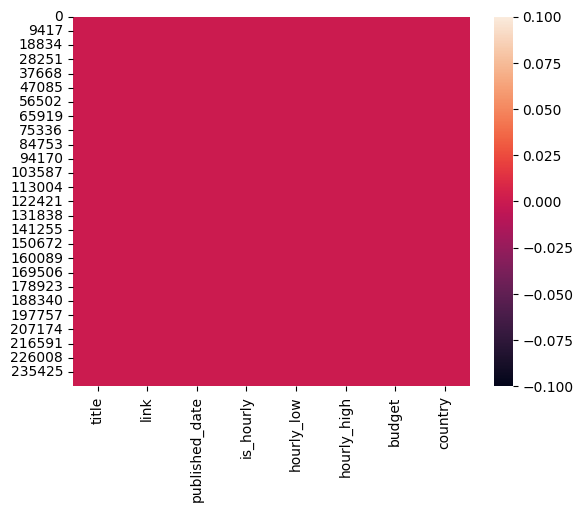

In [20]:
sns.heatmap(d1.isnull())
plt.show()

In [21]:
d1.duplicated().any()

False

In [22]:
d1.sample(10)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
242060,Develop flutter application for small TicTacTo...,https://www.upwork.com/jobs/Develop-flutter-ap...,2024-03-23 05:14:05+00:00,False,17.339644,41.97061,10.000000,India
66091,Looking for dropshipping private supplier,https://www.upwork.com/jobs/Looking-for-dropsh...,2024-02-25 05:05:41+00:00,True,17.339644,41.97061,911.473564,Canada
27920,Modify a font,https://www.upwork.com/jobs/Modify-font_%7E011...,2024-02-16 21:08:42+00:00,True,17.339644,41.97061,911.473564,United States
49457,YouTube-Video-Editor for Football/Soccer,https://www.upwork.com/jobs/YouTube-Video-Edit...,2024-02-21 11:01:17+00:00,True,20.000000,40.00000,911.473564,Germany
46299,Closer,https://www.upwork.com/jobs/Closer_%7E01bfe879...,2024-02-21 00:52:28+00:00,True,17.339644,41.97061,911.473564,United States
85844,Three.js expert needed for immediate assignment,https://www.upwork.com/jobs/Three-expert-neede...,2024-02-28 17:07:29+00:00,True,15.000000,30.00000,911.473564,United States
238878,Virtual Assistant | Work inside a digital mark...,https://www.upwork.com/jobs/Virtual-Assistant-...,2024-03-22 13:30:53+00:00,True,8.000000,15.00000,911.473564,United Kingdom
214569,Sales Development Rep for Cold Calling Needed,https://www.upwork.com/jobs/Sales-Development-...,2024-03-15 21:49:40+00:00,True,35.000000,75.00000,911.473564,United States
236039,Logo Designer,https://www.upwork.com/jobs/Logo-Designer_%7E0...,2024-03-22 07:15:43+00:00,True,15.000000,60.00000,911.473564,United States
40197,"GHL api expert , css, js",https://www.upwork.com/jobs/GHL-api-expert-css...,2024-02-22 04:34:50+00:00,True,10.000000,15.00000,911.473564,Israel


In [24]:
d1['Average_hourly_rate'] = (d1['hourly_low'] + d1['hourly_high']) / 2

In [25]:
d1.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,Average_hourly_rate
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.97061,500.000000,United States,29.655127
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.97061,1100.000000,United States,29.655127
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.000000,30.00000,911.473564,United States,20.000000
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,17.339644,41.97061,911.473564,United States,29.655127
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,17.339644,41.97061,650.000000,India,29.655127


In [27]:
vectorizer = CountVectorizer(stop_words='english', max_features=25)
keywords_matrix = vectorizer.fit_transform(d1['title'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [28]:
analysis_df = pd.concat([d1['budget'],keywords_df], axis=1)
analysis_df.head()

,budget,amp,app,assistant,content,create,data,design,designer,developer,...,media,need,needed,social,specialist,video,web,website,wordpress,youtube
0,500.000000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1100.000000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,911.473564,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,911.473564,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
d1['publisheddate'] = pd.to_datetime(d1['published_date'])
d1['year'] = d1['publisheddate'].dt.year
d1['day_of_week'] = d1['publisheddate'].dt.dayofweek
d1['day'] = d1['publisheddate'].dt.day
d1['is_even_day'] = (d1['day'] % 2 == 0).astype(int)



In [38]:
def categorize_job(title):
    title = title.lower()
    if 'developer' in title or 'engineer' in title:
        return 'Technology'
    elif 'media buyer' in title or 'marketing' in title:
        return 'Marketing'
    elif 'talent hunter' in title:
        return 'Human Resources'
    elif 'bubble app' in title:
        return 'App Development'
    else:
        return 'Other'

# Apply categorization
d1['job_category'] = d1['title'].apply(categorize_job)

# Display the updated DataFrame
print(d1[['title', 'job_category']])


                                                    title     job_category
0       Experienced Media Buyer For Solar Pannel and R...        Marketing
1                                    Full Stack Developer       Technology
2                                         SMMA Bubble App  App Development
3                  Talent Hunter Specialized in Marketing        Marketing
4                                           Data Engineer       Technology
...                                                   ...              ...
244823  Need Facebook advertising experts to launch pr...            Other
244824          Digital/Telemarketing/Sales/OutSide Sales        Marketing
244825                           WordPress Template Edits            Other
244826            ELEMENTOR PRO For quick fix (Wordpress)            Other
244827              Creating a UGC Ad for Our Mobile Game            Other

[244828 rows x 2 columns]


In [40]:
def infer_category(title):
    title = str(title).lower()
    categories = {
        'Developer/Engineer': ['developer', 'engineer', 'programmer', 'coder', 'website'],
        'Designer': ['web design', 'designer', 'ui', 'ux', 'graphic'],
        'Manager': ['manager', 'lead', 'supervisor'],
        'Specialist/Analyst': ['specialist', 'consultant', 'analyst'],
        'Assistant/Support': ['assistant', 'coordinator', 'support'],
        'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser'],
        'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],
        'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],
        'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],
        'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],
        'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor']
    }
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'

d1['category'] = d1['title'].apply(infer_category)

<ipython-input-40-3d6ba3d1639f>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d1['year_month'] = d1['publisheddate'].dt.to_period('M').astype(str)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Extract titles from 'Other' category and vectorize with TF-IDF
other_titles = d1[d1['category'] == 'Other']['title'].dropna()
tfidf_matrix = TfidfVectorizer(stop_words='english', max_features=500).fit_transform(other_titles)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Assign clusters to 'subcategory'
d1.loc[d1['category'] == 'Other', 'subcategory'] = clusters

# Analyze and display cluster keywords
cluster_keywords = {i: [word for word, _ in Counter(' '.join(other_titles[clusters == i]).split()).most_common(10)] for i in range(num_clusters)}

# Print cluster insights
for cluster, keywords in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: for, and, to, a, -, in, Video, with, of, Editor
Cluster 1: App, app, for, and, to, Mobile, Development, a, Android, -
Cluster 2: Needed, for, needed, Expert, to, and, Video, -, Editor, in
Cluster 3: Create, a, for, to, create, and, an, in, of, on
Cluster 4: Expert, for, expert, and, to, Google, a, Ads, Looking, -


In [43]:
d1.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'Average_hourly_rate',
       'publisheddate', 'year', 'day_of_week', 'day', 'is_even_day',
       'job_category', 'year_month', 'category', 'subcategory'],
      dtype='object')

In [46]:
features = ['is_hourly', 'hourly_low', 'hourly_high', 'year','day', 'country']
target = 'budget'

# Prepare features and target
X = d1[features]
y = d1[target]

#  One-hot encoding of categorical variables
categorical_features = ['country']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

#  Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Build and train the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
model_pipeline.fit(X_train, y_train)

#  Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)

#  Compute performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 609.2872160202253
R²: -0.012554391813666355


In [60]:

# Define an error threshold
threshold = 20  # 10% threshold for accuracy

# Calculate accuracy based on threshold
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold * y_test) * 100

# Print the regression accuracy
print(f"Regression Accuracy: {accuracy:.2f}%")

Regression Accuracy: 89.10%


In [62]:

import pickle

with open('jobs', 'wb') as file:
    pickle.dump(d1, file)

print("Data saved as pickle file 'jobs.pkl'")

Data saved as pickle file 'jobs.pkl'
